# **Bank Customer Churn Model**

**Introduction**

In this module, we focus on solving a common problem in machine learning: class imbalance. Class imbalance occurs when the number of instances of one class significantly outweighs the other, leading to biased models that perform poorly on the minority class. The goal of this module is to apply various sampling techniques—oversampling and undersampling—and optimize a Support Vector Machine (SVM) model using GridSearchCV to enhance model performance.

To start, the dataset is split into training and testing sets, and we apply different sampling methods to balance the class distribution. Next, we standardize the data to ensure that features are on the same scale, allowing the SVM model to perform optimally. We then evaluate the model's performance by analyzing confusion matrices and classification reports to assess metrics like precision, recall, and F1-score.

Finally, hyperparameter tuning is performed using GridSearchCV to fine-tune the SVM model and find the best set of hyperparameters. This process ensures that the model is well-optimized for better predictive performance, especially on the minority class. The overall objective is to demonstrate how effective sampling techniques and hyperparameter tuning can improve the accuracy and generalization of classification models in imbalanced datasets.


**Implementation**

**Step 1: Importing Libraries**

Imports libraries that are commonly used for data analysis and visualization :

1. **`import pandas as pd`**:  
   - This imports the **pandas** library and gives it the alias `pd`. Pandas is used for data manipulation and analysis. It will allow you to load, clean, and process data, typically in the form of tables (called DataFrames).

2. **`import numpy as np`**:  
   - This imports the **numpy** library and gives it the alias `np`. Numpy is useful for numerical operations, especially with arrays or matrices. It can help perform operations like mathematical calculations, linear algebra, and handling large datasets of numbers.

3. **`import matplotlib.pyplot as plt`**:  
   - This imports the **pyplot** module from the **matplotlib** library and gives it the alias `plt`. This module is commonly used to create static, animated, and interactive visualizations, such as bar charts, line plots, histograms, etc. It helps you visualize data.

4. **`import seaborn as sns`**:  
   - This imports the **seaborn** library and gives it the alias `sns`. Seaborn is built on top of matplotlib and is used to create statistical graphics. It simplifies the process of making visually appealing charts and can automatically handle some of the formatting for you.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Step 2:  Loading and Exploring Data**


*  **pd.read_csv():** This is a function from the pandas library, used to read a CSV (Comma-Separated Values) file and load it into a pandas DataFrame.
*  **df:** This variable is assigned the DataFrame created from the CSV file. A DataFrame is a 2-dimensional labeled data structure, similar to a table, where each column can hold different types of data.

*   **df.head()** is used to view the first few rows of the DataFrame df. By default, head() displays the first 5 rows of the DataFrame, allowing you to get a quick preview of the data, such as the column names and the initial entries.





In [ ]:
df=pd.read_csv('Bank Churn Modelling.csv')
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0




*   **df.info()** is used to display a summary of the DataFrame, giving you essential information about the dataset's structure.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerId        10000 non-null  int64  
 1   Surname           10000 non-null  object 
 2   CreditScore       10000 non-null  int64  
 3   Geography         10000 non-null  object 
 4   Gender            10000 non-null  object 
 5   Age               10000 non-null  int64  
 6   Tenure            10000 non-null  int64  
 7   Balance           10000 non-null  float64
 8   Num Of Products   10000 non-null  int64  
 9   Has Credit Card   10000 non-null  int64  
 10  Is Active Member  10000 non-null  int64  
 11  Estimated Salary  10000 non-null  float64
 12  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB




*   **df.duplicated():** This function checks if any rows in the DataFrame are duplicates. By default, it checks across all columns, but by specifying a column (e.g., 'CustomerId'), it will look for duplicate values in that particular column.
*   **.sum():** This sums up all the True values returned by df.duplicated('CustomerId'). Since True is treated as 1 and False as 0, .sum() will give the total number of duplicate CustomerId values.



In [ ]:
df.duplicated('CustomerId').sum()

0



*   **df.set_index('CustomerId'):**





1.   **set_index():**This function is used to set a column
(or multiple columns) as the index of the DataFrame. The index in a DataFrame is a label or identifier for each row, which can help with faster lookups, alignments, or joining operations.

2.  **'CustomerId':** This specifies the column to use as the new index. In this case, CustomerId will become the index of the DataFrame.


*   **df = :**
The result of set_index('CustomerId') is assigned back to df. This makes the change permanent by replacing the old DataFrame with the new one where CustomerId is now the index.












In [ ]:
df = df.set_index('CustomerId')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 15634602 to 15628319
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Surname           10000 non-null  object 
 1   CreditScore       10000 non-null  int64  
 2   Geography         10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Tenure            10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Num Of Products   10000 non-null  int64  
 8   Has Credit Card   10000 non-null  int64  
 9   Is Active Member  10000 non-null  int64  
 10  Estimated Salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1015.6+ KB


**Step 3 : ENCODING**



*   **df ['Geography'] :**
This accesses the Geography column from the DataFrame df. The Geography column likely contains categorical data, such as country names or regions.
*   **.value_counts():**
This function counts the number of times each unique value appears in the Geography column. It returns a Series where the index is the unique values from the column, and the corresponding value is the count of occurrences for each of those unique values.



In [ ]:
df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477




*  **df.replace({'Geography' : {'France': 2, 'Germany': 1,'Spain': 0 }})**  : The function replaces categorical values in the `Geography` column of the DataFrame with numeric codes (`France` to `2`, `Germany` to `1`, `Spain` to `0`) directly in the original DataFrame.



In [ ]:

df = df.replace({'Geography': {'France': 2, 'Germany': 1, 'Spain': 0}})



*  **df['Gender'].value_counts() :** The code counts how many times each unique value appears in the **`Gender`** column of the DataFrame, returning the counts of each category (e.g., Male, Female) in descending order.



In [ ]:
df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543




*  **df.replace({'Gender' : {'Male': 0, 'Female': 1, }}) :** The code replaces **`'Male'`** with **`0`** and **`'Female'`** with **`1`** in the **`Gender`** column of the DataFrame, modifying the DataFrame directly using `inplace=True` for numerical encoding.



In [ ]:
df.replace({'Gender' : {'Male': 0, 'Female': 1, }})

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,Num Of Products,Has Credit Card,Is Active Member,Estimated Salary,Churn,Zero Balance
CustomerId,,,,,,,,,,,,,
15634602,Hargrave,619,2,1,42,2,0.00,0,1,1,101348.88,1,0
15647311,Hill,608,0,1,41,1,83807.86,0,0,1,112542.58,0,1
15619304,Onio,502,2,1,42,8,159660.80,1,1,0,113931.57,1,1
15701354,Boni,699,2,1,39,1,0.00,1,0,0,93826.63,0,0
15737888,Mitchell,850,0,1,43,2,125510.82,0,1,1,79084.10,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,Obijiaku,771,2,0,39,5,0.00,1,1,0,96270.64,0,0
15569892,Johnstone,516,2,0,35,10,57369.61,0,1,1,101699.77,0,1
15584532,Liu,709,2,1,36,7,0.00,0,0,1,42085.58,1,0




*  **df.replace({'Num Of Products' : {1: 0, 2: 1, 3:1,4:1 }}, inplace=True):** The code replaces **`1`** with **`0`** and **`2`, `3`, `4`** with **`1`** in the **`Num Of Products`** column of the DataFrame, updating the DataFrame directly with `inplace=True`.



In [ ]:
df.replace({'Num Of Products' : {1: 0, 2: 1, 3:1,4:1 }}, inplace=True)



*  **df['Has Credit Card'].value_counts() :** The code counts the occurrences of each unique value in the **`Has Credit Card`** column, returning the number of customers with and without a credit card in descending order.



In [ ]:
df['Has Credit Card'].value_counts()

,count
Has Credit Card,
1,7055
0,2945




*   **df['Is Active Member'].value_counts() :**The code counts the occurrences of each unique value in the **`Is Active Member`** column, showing how many customers are active members and how many are not, sorted by frequency.




In [ ]:
df['Is Active Member'].value_counts()

,count
Is Active Member,
1,5151
0,4849




*  **df.loc[(df['Balance']==0), 'Churn'].value_counts() :** The code filters rows where **`Balance`** is `0`, then counts the occurrences of each unique value in the **`Churn`** column, showing how many churned and didn't churn for these customers.



In [ ]:
df.loc[(df['Balance']==0), 'Churn'].value_counts()

,count
Churn,
0,3117
1,500




*  **df['Zero Balance']= np.where(df['Balance']>0,1,0) :**
The code creates a new column Zero Balance in the DataFrame, assigning 1 where Balance is greater than 0, and 0 where Balance is 0, using np.where().



In [ ]:
df['Zero Balance']= np.where(df['Balance']>0,1,0)



*   **df['Zero Balance'].hist() :**The code creates a histogram of the **`Zero Balance`** column, displaying the distribution of customers with a balance greater than 0 (1) and those with a balance of 0 (0).



<Axes: >

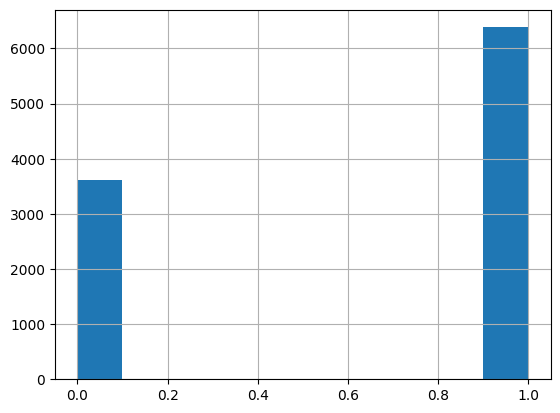

In [ ]:
df['Zero Balance'].hist()



*   **df.groupby(['Churn','Geography']).count() :**The code groups the DataFrame by **`Churn`** and **`Geography`**, then counts the number of occurrences for each combination of churn status and geography, displaying the count of non-null entries in each group.



In [ ]:
df.groupby(['Churn','Geography']).count()

Surname  CreditScore  Gender   Age  Tenure  Balance  \
Churn Geography                                                        
0     0             2064         2064    2064  2064    2064     2064   
      1             1695         1695    1695  1695    1695     1695   
      2             4204         4204    4204  4204    4204     4204   
1     0              413          413     413   413     413      413   
      1              814          814     814   814     814      814   
      2              810          810     810   810     810      810   

                 Num Of Products  Has Credit Card  Is Active Member  \
Churn Geography                                                       
0     0                     2064             2064              2064   
      1                     1695             1695              1695   
      2                     4204             4204              4204   
1     0                      413              413               413   
      1                      814              814               814   
      2                      810              810               810   

                 Estimated Salary  Zero Balance  
Churn Geography                                  
0     0                      2064          2064  
      1                      1695          1695  
      2                      4204          4204  
1     0                       413           413  
      1                       814           814  
      2                       810           810

**Step 4 : Modelling**


*   **df.columns** returns a list of all column names in the DataFrame df, allowing you to see the structure and features available in the dataset.



In [ ]:
df.columns

Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'Num Of Products', 'Has Credit Card', 'Is Active Member',
       'Estimated Salary', 'Churn', 'Zero Balance'],
      dtype='object')



*   **X=df.drop(['Surname','Churn'], axis = 1) :** The code drops the **`Surname`** and **`Churn`** columns from the DataFrame `df` and stores the result in `X`, which contains all other columns, used for features in model training.



In [ ]:
X=df.drop(['Surname','Churn'], axis = 1)



*   **y=df['Churn'] :**The code assigns the **`Churn`** column from the DataFrame `df` to the variable `y`, which will be used as the target variable (label) for model training or analysis.



In [ ]:
y=df['Churn']



*   **X.shape:** Shows the number of rows and columns in X (features).

*  **y.shape:** Shows the number of rows in y (target)



In [ ]:
X.shape, y.shape

((10000, 11), (10000,))



*   **df['Churn'].value_counts() :** Counts the occurrences of each unique value in the **`Churn`** column, showing how many customers have churned and how many have not, sorted by frequency.



In [ ]:
df['Churn'].value_counts()

,count
Churn,
0,7963
1,2037




*   **sns.countplot(x='Churn', data=df)** creates a count plot that visualizes the distribution of the Churn column, showing the count of customers who have churned vs. those who haven't.



<Axes: xlabel='Churn', ylabel='count'>

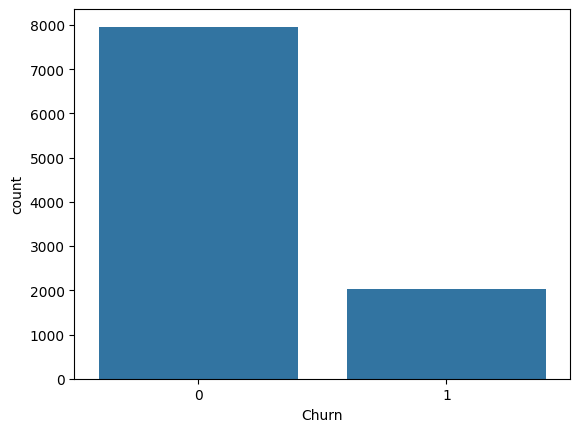

In [ ]:
sns.countplot(x ='Churn', data =df)

In [ ]:
X.shape ,y.shape

((10000, 11), (10000,))

**Step 5 : random undersampling**

*   **from imblearn.under_sampling import RandomUnderSampler** imports the RandomUnderSampler class from the imblearn library, which is used to balance class distribution by randomly undersampling the majority class in imbalanced datasets.



In [ ]:
from imblearn.under_sampling import RandomUnderSampler



*   **rus = RandomUnderSampler(random_state=2529)** creates an instance of the RandomUnderSampler with a specified random seed (2529) to ensure reproducibility when performing random undersampling to balance class distribution.



In [ ]:
rus= RandomUnderSampler(random_state=2529)



*   `X_rus, y_rus = rus.fit_resample(X, y)` applies **random undersampling** to the features (`X`) and target (`y`), creating balanced datasets (`X_rus`, `y_rus`) by reducing the majority class.



In [ ]:
X_rus, y_rus = rus.fit_resample(X,y)

In [ ]:
X_rus.shape, y_rus.shape, X.shape, y.shape

((4074, 11), (4074,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
y_rus.value_counts()

,count
Churn,
0,2037
1,2037


<Axes: ylabel='Frequency'>

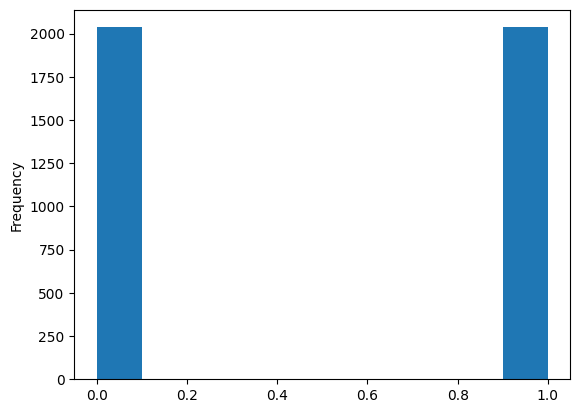

In [ ]:
y_rus.plot(kind='hist')

**Step 6 : random over sampling**


*    `from imblearn.over_sampling import RandomOverSampler` imports the **`RandomOverSampler`** class from the **`imblearn`** library, used to balance class distribution by randomly oversampling the minority class in imbalanced datasets.



In [ ]:
from imblearn.over_sampling import RandomOverSampler



*   `ros = RandomOverSampler(random_state=2529)` creates an instance of the **`RandomOverSampler`** with a specified random seed (`2529`) to ensure reproducibility when performing random oversampling to balance the minority class.




In [ ]:
ros= RandomOverSampler(random_state=2529)




*   `X_ros, y_ros = ros.fit_resample(X, y)` applies **random oversampling** to the features (`X`) and target (`y`), creating balanced datasets (`X_ros`, `y_ros`) by increasing the minority class.



In [ ]:
X_ros, y_ros = ros.fit_resample(X,y)

In [ ]:
X_ros.shape, y_ros.shape ,X.shape ,y.shape

((15926, 11), (15926,), (10000, 11), (10000,))

In [ ]:
y.value_counts()

,count
Churn,
0,7963
1,2037


In [ ]:
y_ros.value_counts()

,count
Churn,
1,7963
0,7963


<Axes: ylabel='Frequency'>

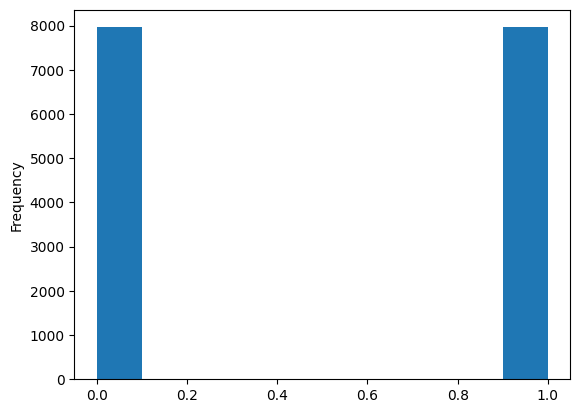

In [ ]:
y_ros.plot(kind ='hist')

**Step 7 : TRAIN SPLIT TEST**

In [ ]:
from sklearn.model_selection import train_test_split



*   **Split original data**



In [ ]:
X_train ,X_test, y_train, y_test =train_test_split(X,y,test_size=0.3,random_state=2529)



*  **Split randon under sample data**




In [ ]:
X_train_rus ,X_test_rus, y_train_rus, y_test_rus =train_test_split(X_rus,y_rus,test_size=0.3,random_state=2529)



*  **Split random over sample data**



In [ ]:
X_train_ros ,X_test_ros, y_train_ros, y_test_ros =train_test_split(X_ros,y_ros,test_size=0.3,random_state=2529)

**Standardize Feature**

*   `from sklearn.preprocessing import StandardScaler` imports the **`StandardScaler`** class from the **`sklearn.preprocessing`** module, which is used to standardize features by removing the mean and scaling to unit variance.
*   `sc = StandardScaler()` creates an instance of the **`StandardScaler`**, which can be used to standardize numerical features in the dataset by transforming them to have a mean of 0 and a standard deviation of 1.



In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()



*   **Standardize original data**




In [ ]:
X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test[['CreditScore','Age','Tenure','Balance','Estimated Salary']])



*   **Standardize random under sample data**




In [ ]:
X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_rus[['CreditScore','Age','Tenure','Balance','Estimated Salary']])



*   **Standardize random over sample data**




In [ ]:
X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_train_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

In [ ]:
X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']]=sc.fit_transform(X_test_ros[['CreditScore','Age','Tenure','Balance','Estimated Salary']])

**Step 8 : Model Evaluation & Accuracy**


1.   **Support Vector machine Classifier**

*   `from sklearn.svm import SVC` imports the **`SVC`** (Support Vector Classification) class from **`sklearn.svm`**, which is used to implement a support vector machine (SVM) for classification tasks.

*    `svc = SVC()` creates an instance of the **`SVC`** (Support Vector Classification) model with default parameters, which can be used for classification tasks using a support vector machine.
*   `svc_ros = SVC()` creates an instance of the **`SVC`** (Support Vector Classification) model, which can be used for classification tasks. This specific instance, `svc_ros`, is likely intended for use with an oversampled dataset.

*   `svc_rus = SVC()` creates an instance of the **`SVC`** (Support Vector Classification) model, which is used for classification tasks. This specific instance, `svc_rus`, is likely intended for use with an undersampled dataset.










In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()

In [ ]:
svc_ros=SVC()

In [ ]:
svc_rus =SVC()



*   `svc.fit(X_train, y_train)` trains the **`SVC`** (Support Vector Classification) model using the training data (`X_train` for features and `y_train` for the target), allowing the model to learn patterns for classification.

*   `svc_ros.fit(X_train_ros, y_train_ros)` trains the **`SVC`** (Support Vector Classification) model on the oversampled training data (`X_train_ros` for features and `y_train_ros` for the target) to classify the balanced dataset.
*   `svc_rus.fit(X_train_rus, y_train_rus)` trains the **`SVC`** (Support Vector Classification) model on the undersampled training data (`X_train_rus` for features and `y_train_rus` for the target) to classify the balanced dataset.






In [ ]:
svc.fit(X_train,y_train)

SVC()

In [ ]:
svc_ros.fit(X_train_ros,y_train_ros)

SVC()

In [ ]:
svc_rus.fit(X_train_rus,y_train_rus)

SVC()



*    `y_pred = svc.predict(X_test)` uses the trained **`SVC`** model to make predictions on the test data (`X_test`), storing the predicted class labels in the variable `y_pred`.

*   `y_pred_ros = svc.predict(X_test_ros)` uses the trained **`SVC`** model to make predictions on the oversampled test data (`X_test_ros`), storing the predicted class labels in `y_pred_ros`.
*    `y_pred_rus = svc.predict(X_test_rus)` uses the trained **`SVC`** model to make predictions on the undersampled test data (`X_test_rus`), storing the predicted class labels in `y_pred_rus`.





In [ ]:
y_pred= svc.predict(X_test)

In [ ]:
y_pred_ros= svc.predict(X_test_ros)

In [ ]:
y_pred_rus= svc.predict(X_test_rus)

**Model Accuracy**

--`from sklearn.metrics import confusion_matrix, classification_report` imports two evaluation functions:

- **`confusion_matrix`**: Computes a confusion matrix to evaluate classification performance.
- **`classification_report`**: Generates a detailed report including precision, recall, and F1-score for each class.

--  `confusion_matrix(y_test, y_pred)` computes the **confusion matrix** comparing the true labels (`y_test`) with the predicted labels (`y_pred`). It shows the counts of true positives, false positives, true negatives, and false negatives.

--  `confusion_matrix(y_test_ros, y_pred_ros)` computes the **confusion matrix** comparing the true labels (`y_test_ros`) with the predicted labels (`y_pred_ros`) for the oversampled test data, showing performance metrics.

--  `confusion_matrix(y_test_rus, y_pred_rus)` computes the **confusion matrix** comparing the true labels (`y_test_rus`) with the predicted labels (`y_pred_rus`) for the undersampled test data, showing performance metrics.



In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

array([[2414,    0],
       [ 586,    0]])

In [ ]:
confusion_matrix(y_test_ros,y_pred_ros)

array([[2379,    0],
       [2399,    0]])

In [ ]:
confusion_matrix(y_test_rus,y_pred_rus)

array([[627,   0],
       [596,   0]])

In [ ]:
print(classification_report(y_test,y_pred,zero_division=1))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       1.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.90      0.50      0.45      3000
weighted avg       0.84      0.80      0.72      3000



In [ ]:
print(classification_report(y_test_ros,y_pred_ros, zero_division=1))

              precision    recall  f1-score   support

           0       0.50      1.00      0.66      2379
           1       1.00      0.00      0.00      2399

    accuracy                           0.50      4778
   macro avg       0.75      0.50      0.33      4778
weighted avg       0.75      0.50      0.33      4778



In [ ]:
print(classification_report(y_test_rus,y_pred_rus,zero_division=1))

              precision    recall  f1-score   support

           0       0.51      1.00      0.68       627
           1       1.00      0.00      0.00       596

    accuracy                           0.51      1223
   macro avg       0.76      0.50      0.34      1223
weighted avg       0.75      0.51      0.35      1223





2.   **Hyperparameter tunning**

*   `from sklearn.model_selection import GridSearchCV` imports the **`GridSearchCV`** class, which is used for hyperparameter tuning. It performs an exhaustive search over a specified parameter grid to find the best model parameters.





In [ ]:
from sklearn.model_selection import GridSearchCV



*  The code defines a **`param_grid`** dictionary containing hyperparameters for tuning a model using **`GridSearchCV`**:

- **`C`**: Regularization parameter values (`0.1`, `1`, `10`).
- **`gamma`**: Kernel coefficient values (`1`, `0.1`, `0.01`).
- **`kernel`**: Specifies the kernel type (`'rbf'`).
- **`class_weight`**: Adjusts weights for imbalanced classes (`'balanced'`).

This grid will be used for hyperparameter tuning to optimize the model.




In [ ]:
param_grid ={ 'C': [0.1,1,10],
             'gamma':[1,0.1,0.01],
              'kernel':['rbf'],
              'class_weight':['balanced']

}



*  **GridSearchCV:** Performs hyperparameter tuning on the SVC model using the specified param_grid.


*   **refit=True:** The best model is retrained on the entire training set after finding the best parameters.

*   **verbose=2:** Provides detailed output during the search process.



*   **cv=2:** Uses 2-fold cross-validation to evaluate different parameter combinations.


This optimizes the SVC model by selecting the best hyperparameters from the grid and training the model.



In [ ]:
grid =GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.4s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   2.4s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   1.5s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   1.5s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   1.6s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
grid_rus =GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid_rus.fit(X_train_rus,y_train_rus)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.2s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   0.3s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   0.2s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)

In [ ]:
grid_ros =GridSearchCV(SVC(),param_grid,refit=True,verbose=2, cv=2)
grid_ros.fit(X_train_ros,y_train_ros)

Fitting 2 folds for each of 9 candidates, totalling 18 fits
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ..C=0.1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.7s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   5.2s
[CV] END C=0.1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   3.9s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.8s
[CV] END C=0.1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   4.8s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   4.6s
[CV] END ....C=1, class_weight=balanced, gamma=1, kernel=rbf; total time=   3.8s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.6s
[CV] END ..C=1, class_weight=balanced, gamma=0.1, kernel=rbf; total time=   4.9s
[CV] END .C=1, class_weight=balanced, gamma=0.01, kernel=rbf; total time=   3.9s
[CV] END .C=1, class_weight=balanced, gamma=0.0

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'class_weight': ['balanced'],
                         'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']},
             verbose=2)



*   Prints the **best estimator** (model) found during the **`GridSearchCV`** process, which is the **`SVC`** model with the optimal hyperparameters selected from the `param_grid`.





In [ ]:
print(grid.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)


*   Prints the **best estimator** (model) found during the **`GridSearchCV`** process for the undersampled dataset, showing the **`SVC`** model with the optimal hyperparameters for `X_train_rus` and `y_train_rus`.


In [ ]:
print(grid_rus.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=0.01)




*   Prints the **best estimator** (model) found during the **`GridSearchCV`** process for the oversampled dataset, showing the **`SVC`** model with the optimal hyperparameters for `X_train_ros` and `y_train_ros`.




In [ ]:
print(grid_ros.best_estimator_)

SVC(C=1, class_weight='balanced', gamma=1)




*  
```python
grid_predictions = grid.predict(X_test)
```

uses the best model from **`GridSearchCV`** to make predictions on the **`X_test`** dataset, storing the predicted class labels in the variable **`grid_predictions`**.
*   
```python
grid_predictions_rus = grid.predict(X_test_rus)
```

uses the best model from **`GridSearchCV`** to make predictions on the undersampled test data (**`X_test_rus`**), storing the predicted class labels in **`grid_predictions_rus`**.

*   
```python
grid_predictions_ros = grid.predict(X_test_ros)
```

uses the best model from **`GridSearchCV`** to make predictions on the oversampled test data (**`X_test_ros`**), storing the predicted class labels in **`grid_predictions_ros`**.





In [ ]:
grid_predictions= grid.predict(X_test)

In [ ]:
grid_predictions_rus= grid.predict(X_test_rus)

In [ ]:
grid_predictions_ros= grid.predict(X_test_ros)

**Model Accuracy**

*   **confusion_matrix(y_test,grid_predictions):** computes the confusion matrix by comparing the true labels (y_test) with the predicted labels (grid_predictions) from the GridSearchCV-optimized model, showing performance metrics like true positives, false positives, etc.
*  **confusion_matrix(y_test_rus,grid_predictions_rus):** computes the confusion matrix by comparing the true labels (y_test_rus) with the predicted labels (grid_predictions_rus) from the GridSearchCV-optimized model, specifically for the undersampled test data.

*   **confusion_matrix(y_test_ros,grid_predictions_ros):** computes the confusion matrix by comparing the true labels (y_test_ros) with the predicted labels (grid_predictions_ros) from the GridSearchCV-optimized model, specifically for the oversampled test data.






In [ ]:
confusion_matrix(y_test,grid_predictions)

array([[2414,    0],
       [ 586,    0]])

In [ ]:
confusion_matrix(y_test_rus,grid_predictions_rus)

array([[627,   0],
       [162, 434]])

In [ ]:
confusion_matrix(y_test_ros,grid_predictions_ros)

array([[2379,    0],
       [ 791, 1608]])

In [ ]:
print(classification_report(y_test, grid_predictions, zero_division=1))


              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2414
           1       1.00      0.00      0.00       586

    accuracy                           0.80      3000
   macro avg       0.90      0.50      0.45      3000
weighted avg       0.84      0.80      0.72      3000



In [ ]:
print(classification_report(y_test_rus,grid_predictions_rus))

              precision    recall  f1-score   support

           0       0.79      1.00      0.89       627
           1       1.00      0.73      0.84       596

    accuracy                           0.87      1223
   macro avg       0.90      0.86      0.86      1223
weighted avg       0.89      0.87      0.86      1223



In [ ]:
print(classification_report(y_test_ros,grid_predictions_ros))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      2379
           1       1.00      0.67      0.80      2399

    accuracy                           0.83      4778
   macro avg       0.88      0.84      0.83      4778
weighted avg       0.88      0.83      0.83      4778



**Conclusion:**

This module demonstrates the importance of handling class imbalance in machine learning tasks, especially when dealing with datasets where one class significantly outnumbers the other. By applying undersampling and oversampling techniques, we can balance the data and improve model predictions for the minority class. The use of Support Vector Machines (SVM), combined with hyperparameter tuning through GridSearchCV, allows for optimization of the model’s performance.

The results show that although SVM performs well on the majority class, issues arise when it comes to predicting the minority class. However, after applying sampling techniques and fine-tuning hyperparameters, the model performance improves significantly, especially for the undersampled and oversampled datasets. This demonstrates that data balancing and model optimization are crucial steps in building robust, fair, and effective machine learning models.

In conclusion, this exercise highlights the importance of preprocessing techniques and model optimization in improving classification performance on imbalanced datasets. Moving forward, additional techniques such as ensemble methods or advanced algorithms like XGBoost could be explored to further enhance model robustness and accuracy.